# Alibi Jangeldin  
# HW2 
# Bayesian Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#data generation
N = 20
x = np.random.uniform(-1, 1, N)
y = -0.3 + 0.5*x + np.random.normal(0, 0.2, N)
plt.scatter(x, y)
alpha = 2
beta = 25
intervals = 100

In [3]:
#coefficients likelihood visualization
def likelihood_plot(index):
    plt.subplot(1, 3, 1)    
    w0 = w1 = np.linspace(-1, 1, intervals)
    z = np.zeros((intervals, intervals))
    point = np.array([1, x[index - 1]])
    for i in range(0, intervals):
        for j in range(0, intervals):
            coef_vals = [w0[i], w1[j]]
            like_vals = np.dot(np.transpose(coef_vals), point)
            power = -0.5 * (y[0]-like_vals)**2/(beta**(-2))
            z[j, i] = 1/((2*math.pi)**0.5)/(abs(beta**(-2))**0.5)*math.e**(power)

    plt.contourf(w0, w1, z, intervals)
    plt.title('likelihood')

In [4]:
#coefficients weights visualization
def prior_plot(mu, sigma):
    plt.subplot(1, 3, 2)
    w0 = w1 = np.linspace(-1, 1, intervals)
    z = np.zeros((intervals, intervals))
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    for i in range(0, intervals):
        for j in range(0, intervals):
            coef_vals = [w0[i], w1[j]]
            power = -0.5 * np.array(np.dot(np.dot(np.transpose(coef_vals-mu), sigma_inv), coef_vals-mu))
            z[j, i] = 1/(2*math.pi)/(abs(sigma_det)**0.5)*math.e**(power)

    plt.contourf(w0, w1, z, intervals)
    plt.title('prior/posterior')

In [5]:
#hypothesis lines visualization
def data_plot(w0, w1, n):
    plt.subplot(1, 3, 3)
    vals = np.linspace(-1, 1, intervals)
    axes = plt.gca()
    axes.set_xlim([-1,1])
    axes.set_ylim([-1,1])
    plt.plot(x[:n], y[:n], 'bo')    
    for i in range(0, 6):
        y_vals = w0[i]+vals*w1[i]
        plt.plot(vals, y_vals, 'red')
    
    plt.title('data space')
    plt.show()

In [6]:
#batch learning of n first points
def bayes_batch_learn(n):
    X = np.vstack((np.ones(n), x[:n])).T
    sig_12 = np.linalg.inv(alpha*np.identity(2)+beta*np.dot(np.transpose(X), X))
    m_12 = beta * np.dot(np.dot(sig_12, np.transpose(X)), y[:n]) 
    return m_12, sig_12

In [7]:
#function to get plots according to number of points
def plot_all(num_points):
    likelihood_plot(num_points)
    mu, s = bayes_batch_learn(num_points)
    prior_plot(mu, s)
    w00, w10 = np.random.multivariate_normal(mu, s, 6).T
    data_plot(w00, w10, num_points)

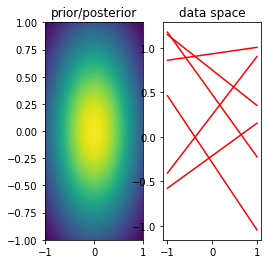

In [8]:
#0 points (1st row in the book)
mu0 = np.array([0,0])
s0 = np.eye(2)/2
prior_plot(mu0, s0)
w00, w10 = np.random.multivariate_normal(mu0, s0, 6).T
data_plot(w00, w10, 0)

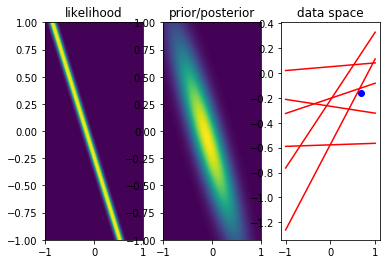

In [9]:
plot_all(1)

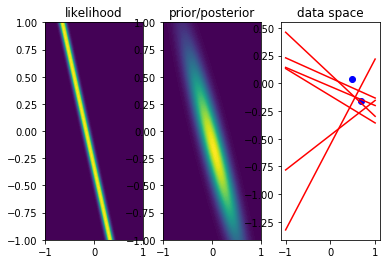

In [10]:
plot_all(2)

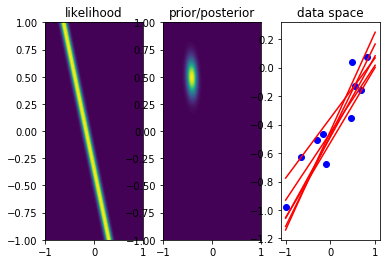

In [11]:
plot_all(10)

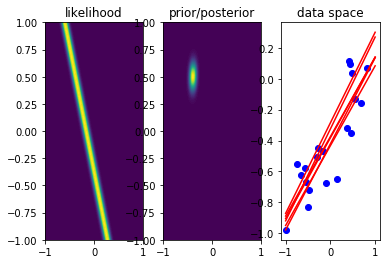

In [12]:
plot_all(20)

As we can see from the plots above they are very similar to what we got in the book. We can choose one of the two options to update the parameters, incremental one-by-one data point or all points at the same time. The good part is that in either way the resulting coefficients will be the same. I chose the latter approach in bayes_batch_learn function due to its simplicity.  At the beginning fit is not so good due to lack of points but then we get better results with 10 points already. At the end with all 20 points the fit is pretty good at capturing the relationship with posterior near to (-0.3,0.5) initial coefficients.